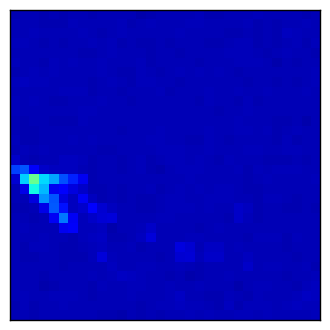

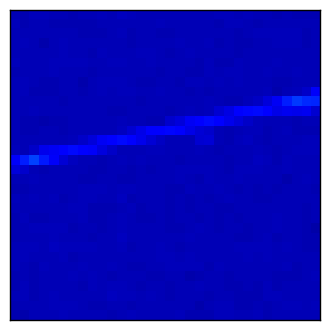

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import *
import scipy.misc
import pickle

dims=[256,256]
finaldims=[32,32]

def propagate(biprob,Edep,maxNewE,invisprob,aa=None,E=None,c=None,d=None,vis=None):
    """
    Recursive function to generate a track-like or shower-like object depending on the passed parameters.
    biprob: bifurcation probabibility (probability of spawning a track)
    Edep: amount of energy deposited per unit length
    maxNewE: maximum energy of spawn
    invisprob: probability that daughter is invisible
    aa: (optional) numpy array containing current Edeps in 2d grid
    E: (optional) energy (default energy is randomized)
    c: (optional) position
    d: (optional) direction
    vis: (optional, bool) particle visibility (whether it deposits energy or not)
    """
    if aa is None:
        c=np.array([int(dims[0]/2),0.])
        d=np.random.rand()*pi
        aa=np.random.randint(low=0,high=25,size=dims, dtype=np.uint8)
        E=100+np.random.rand()*1000.
        vis=True

    while E>0 and c[0]<dims[0] and c[0]>=0 and c[1]<dims[0] and c[1]>=0:
        if vis: 
            aa[int(c[0]),int(c[1])] += 255*(Edep + 0.1*np.random.rand())
            E-=Edep
        c+=[cos(d),sin(d)]
        Enew=np.random.rand()*maxNewE
        if(np.random.rand()<biprob and E>Enew):
            dnew=d + (np.random.rand()-0.5)*pi/4
            cnew=np.copy(c)
            visnew=(np.random.rand()>invisprob)
            aa=propagate(biprob,Edep,maxNewE,visnew,aa,Enew,cnew,dnew,visnew)
            E-=Enew
        
    return aa
        
def drawplot(biprob,Edep,maxNewE,invisprob, draw=True):
    aa=propagate(biprob=biprob,Edep=Edep,maxNewE=maxNewE,invisprob=invisprob)
    aa=scipy.misc.imresize(aa,(32,32))
    if draw: 
        plt.matshow(aa,vmin=0,vmax=255)
        #turn off tick labels
        plt.xticks([])
        plt.yticks([])
    return aa

a=drawplot(biprob=0.3,Edep=0.8, maxNewE=100, invisprob=0.5)
b=drawplot(biprob=0.01,Edep=0.7, maxNewE=20, invisprob=0.1)



In [4]:
#generate a large sample of showers/tracks for training/testing
from sklearn.utils import shuffle #to shuffle the outputs

def getImagesAndLabelsSample(N):
    images=[]
    labels=[]

    for i in range(N):
        shower=drawplot(biprob=0.3,Edep=0.8, maxNewE=100, invisprob=0.5, draw=False)
        track=drawplot(biprob=0.01,Edep=0.6, maxNewE=20, invisprob=0.01,draw=False)
        images.append(shower)
        labels.append([1,0]) #shower is position 0
        images.append(track)
        labels.append([0,1]) #track is position 1
        
    return images, labels
    
images, labels= getImagesAndLabelsSample(2048)
images, labels= shuffle(images, labels)
pickle.dump( images, open( "images.p", "wb" ) )
pickle.dump( labels, open( "labels.p", "wb" ) )

imagesTest, labelsTest= getImagesAndLabelsSample(2048)
imagesTest, labelsTest= shuffle(imagesTest, labelsTest)
pickle.dump( imagesTest, open( "imagesTest.p", "wb" ) )
pickle.dump( labelsTest, open( "labelsTest.p", "wb" ) )